In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from scipy import stats



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
! git clone https://github.com/ArmanArabi/gsmarena.git

fatal: destination path 'gsmarena' already exists and is not an empty directory.


In [14]:
df = pd.read_csv('/content/gsmarena/data.csv')

In [15]:
df.head()

,Unnamed: 0,name,brand,2G,3G,4G,5G,Announced,Status,Weight,...,Bluetooth,GPU,Loudspeaker,3.5mm jack,Chipset,Network,Internal,Card slot,RAM,Storage
0,0,alcatel 1b (2022),alcatel,True,True,True,False,2022.0,Available,172.0,...,"5.0, A2DP",PowerVR GE8300,True,True,Mediatek MT6761 Helio A22 (12 nm),"GSM / HSPA / LTE HSPA 42.2/11.1 Mbps, LTE Cat4...",32GB 2GB RAM,microSDXC (dedicated slot),2.0,32.0
1,1,alcatel 1l pro (2021),alcatel,True,True,True,False,2021.0,Available,190.0,...,"4.2, A2DP",IMG8322,True,True,Unisoc SC9863A (28nm),"GSM / HSPA / LTE HSPA 21.1/5.76 Mbps, LTE Cat4...",32GB 2GB RAM,microSDXC (uses shared SIM slot),2.0,32.0
2,2,alcatel 1 (2021),alcatel,True,True,True,False,2021.0,Available,134.0,...,"4.2, A2DP, LE",PowerVR GE8100,True,True,Mediatek MT6739 (28 nm),"GSM / HSPA / LTE HSPA 42.2/11.5 Mbps, LTE Cat4...","8GB 1GB RAM, 16GB 1GB RAM",microSDHC (dedicated slot),1.0,8.0
3,3,alcatel 3l (2021),alcatel,True,True,True,False,2021.0,Available,194.0,...,"5.0, A2DP, LE",PowerVR GE8320,True,True,Mediatek MT6762D Helio P22 (12 nm),"GSM / HSPA / LTE HSPA 42.2/5.76 Mbps, LTE Cat4...",64GB 4GB RAM,microSDXC (only single sim model),4.0,64.0
4,4,alcatel 1s (2021),alcatel,True,True,True,False,2021.0,Available,190.0,...,"5.0, A2DP, LE",PowerVR GE8320,True,True,Mediatek MT6762D Helio P22 (12 nm),"GSM / HSPA / LTE HSPA 42.2/5.76 Mbps, LTE Cat4...",32GB 3GB RAM,microSDXC (uses shared SIM slot),3.0,32.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2651 non-null   int64  
 1   name              2651 non-null   object 
 2   brand             2651 non-null   object 
 3   2G                2651 non-null   bool   
 4   3G                2651 non-null   bool   
 5   4G                2651 non-null   bool   
 6   5G                2651 non-null   bool   
 7   Announced         2651 non-null   float64
 8   Status            2651 non-null   object 
 9   Weight            2651 non-null   float64
 10  Length            2651 non-null   object 
 11  Width             2651 non-null   object 
 12  Diameter          2651 non-null   object 
 13  SIM               2651 non-null   object 
 14  Display Type      2651 non-null   object 
 15  Display Size      2651 non-null   float64
 16  ppi               2651 non-null   float64


In [17]:
df2 = df.copy()

**brand**

In [18]:
#df2['brand'] = df2['brand'].astype('category').cat.codes

# Calculate correlation between 'brand_encoded' and 'Price'
corr_matrix_brand = df2[['brand', 'Price']].corr()
corr_matrix_brand
df2['brand'].unique()

<ipython-input-18-c189caf1a521>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_brand = df2[['brand', 'Price']].corr()


array(['alcatel', 'apple', 'asus', 'blu', 'htc', 'huawei', 'infinix',
       'lenovo', 'lg', 'nokia', 'sony', 'zte', 'xiaomi', 'samsung'],
      dtype=object)

**ANNOUANCE , STATUS**

In [19]:
corr_matrix_Announced = df2[['Announced', 'Price']].corr()
corr_matrix_Announced


,Announced,Price
Announced,1.000000,0.266497
Price,0.266497,1.000000


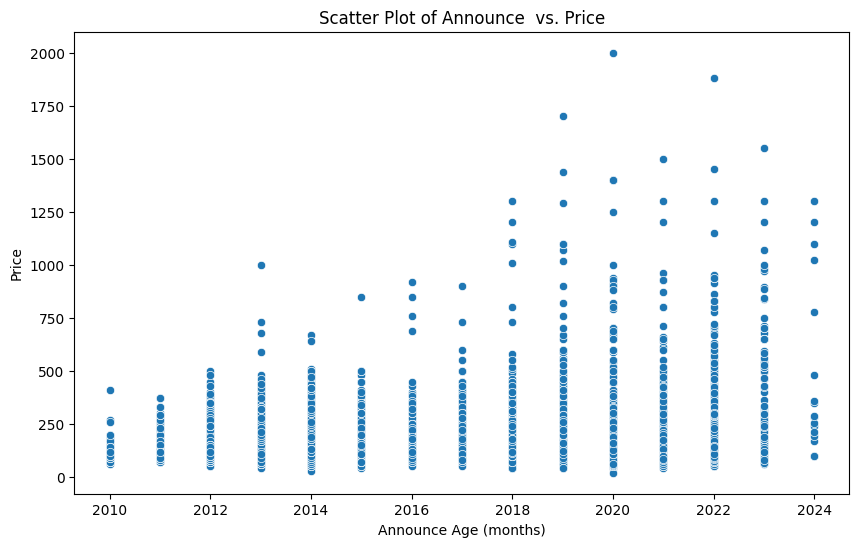

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Announced', y='Price')
plt.title('Scatter Plot of Announce  vs. Price')
plt.xlabel('Announce Age (months)')
plt.ylabel('Price')
plt.show()

In [21]:
# H0 : equel of mean price for each category
# H1 :

f_value, p_value = stats.f_oneway(df2[df2['Status'] == 'Available']['Price'],
                                  df2[df2['Status'] == 'Discontinued']['Price'],
                                  df2[df2['Status'] == 'Coming']['Price'])
print("ANOVA results: F-value =", f_value, ", P-value =", p_value)

ANOVA results: F-value = 68.98145121249789 , P-value = 6.252746129968865e-30


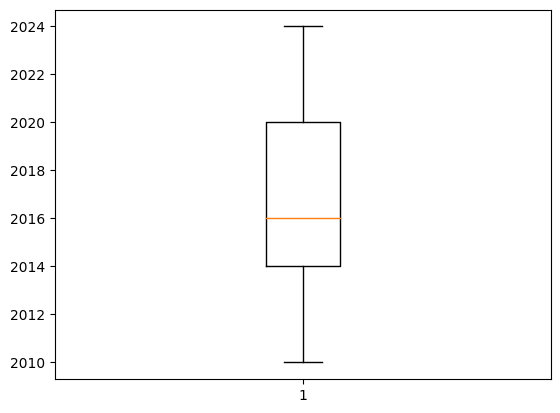

In [22]:
plt.boxplot(df2['Announced']);


In [23]:
df2['Status'].value_counts()


Discontinued    1381
Available       1267
Coming             3
Name: Status, dtype: int64

In [24]:
df2[df2['Announced']==2024]['Price']

176     1199.99
177     1099.99
640      240.00
917      100.00
918      100.00
955      170.00
1834     283.00
1835     193.05
1838     254.00
1839     349.00
1840     289.00
1841     212.17
2119    1299.00
2120    1024.92
2121     779.00
2122     359.00
2123     480.00
Name: Price, dtype: float64

**2 / 3 / 4 / 5 G**

In [25]:
'''
for column in df2[['2G', '3G', '4G', '5G']]:
    # Then convert to int
    df2[column] = df2[column].astype(int)
'''
df2['2G']  = df2['2G'].astype(int)
df2['3G']  = df2['3G'].astype(int)
df2['4G']  = df2['4G'].astype(int)
df2['5G']  = df2['5G'].astype(int)

In [26]:
df2[['2G', '3G', '4G', '5G']][0:10]

,2G,3G,4G,5G
0,1,1,1,0
1,1,1,1,0
2,1,1,1,0
3,1,1,1,0
4,1,1,1,0
5,1,1,1,0
6,1,1,1,0
7,1,1,1,0
8,1,1,1,0
9,1,1,1,0


In [27]:
corr_matrix_2345G = df2[['2G', '3G', '4G', '5G','Price']].corr()
corr_matrix_2345G

,2G,3G,4G,5G,Price
2G,NaN,NaN,NaN,NaN,NaN
3G,NaN,1.000000,0.093555,0.039236,0.053307
4G,NaN,0.093555,1.000000,0.230112,0.275185
5G,NaN,0.039236,0.230112,1.000000,0.463165
Price,NaN,0.053307,0.275185,0.463165,1.000000


In [28]:
df2.drop('Unnamed: 0' ,axis=1, inplace=True)
df2.drop('name', axis=1 , inplace=True)
df2.drop('2G', axis=1 , inplace=True)


In [29]:
#df2.drop(['Announced' , 'Status'] , axis=1 , inplace=True);

**Weight**

In [30]:
corr_matrix_Weight = df2[['Weight', 'Price']].corr()
corr_matrix_Weight

,Weight,Price
Weight,1.000000,0.320519
Price,0.320519,1.000000


In [31]:
df2['Weight'] = df2.Weight.astype(float)

**Length**

In [32]:
'''
matches = df3['Length'].str.findall(r'Unfolded:')
print(matches)
matches2 = df3['Length'][1410:1430].str.extract(r'(Unfolded: )')
print(matches2)
'''
df2['Length'] = df2['Length'].apply(lambda x: float(re.findall(r'\d+\.*\d*', x)[0])
                                    if re.findall(r'\d+\.?\d*', x) else None)


**WIDTH**

In [33]:
for i,row in df2.iterrows():
    if "mm" in row["Width"]:
        df2.at[i, "Width"] = float(row["Width"].split("mm")[0])
    else :
        df2.at[i, "Width"] = float(row["Width"])

**DIAMETERS**

In [34]:
df2["Diameter"] = df2["Diameter"].apply(lambda x: (float(x.split("-")[0]) + float(x.split("-")[1])) / 2
                                        if len(x.split("-")) == 2 else float(x))


**SIM**

In [35]:
print(df2['SIM'].value_counts() )
'''
onehot = OneHotEncoder()
onehot.fit_transform(df3[['SIM']])
'''
dummy_df = pd.get_dummies(df2['SIM'])
df2 = pd.concat([df2, dummy_df], axis=1)
df2.drop('SIM', axis=1, inplace=True)

Nano-SIM     1435
Micro-SIM     636
Mini-SIM      484
eSIM           96
Name: SIM, dtype: int64


**Display Type**

In [36]:
df2['Display Type'].value_counts()[:40]


IPS LCD                                                                         1044
TFT                                                                              240
Super AMOLED                                                                     209
TFT, 256K colors                                                                  92
AMOLED                                                                            58
PLS LCD                                                                           57
IPS LCD, 400 nits (typ)                                                           40
TFT LCD                                                                           28
S-LCD                                                                             24
IPS LCD, 90Hz                                                                     24
Super LCD3                                                                        23
IPS LCD,                                                         

In [37]:
'''
# Sample data simulating your 'Display Type' column with various entries
data = {
    'Display Type': [
        'Super AMOLED Display',
        'AMOLED Touchscreen',
        'IPS LCD Capacitive',
        'TFT Screen, 16M colors',
        'Super LCD Touchscreen',
        'PLS TFT LCD',
        'OLED Screen',
        'Super AMOLED Plus',
        'AMOLED, 16M colors',
        'Generic LCD',
        'Advanced TFT Technology'
    ]
}

# Creating a DataFrame
df3 = pd.DataFrame(data)

# Applying the replacement with regex to differentiate between 'Super AMOLED' and 'AMOLED', and to simplify other types
df4 = df3['Display Type'].replace({
    r'.*Super AMOLED.*': 'Super AMOLED',  # Matches and replaces any string containing "Super AMOLED"
    r'AMOLED.*': 'AMOLED',             # Matches and replaces any string containing "AMOLED"
    r'.*LCD.*': 'LCD',                   # Matches and replaces any string containing "LCD"
    r'.*TFT.*': 'TFT',                   # Matches and replaces any string containing "TFT"
}, regex=True)

# Displaying the original and modified 'Display Type' for comparison
df_comparison = pd.DataFrame({'Original Display Type': df3['Display Type'], 'Modified Display Type': df4})
df_comparison
''';

In [38]:
df2['Display Type'] = df2['Display Type'].replace({r'.*TFT.*': 'TFT', r'.*LCD.*':'LCD' }, regex=True)
df2['Display Type'] = df2['Display Type'].replace({r'Super AMOLED.*': 'S_A_L'}, regex=True)
df2['Display Type'] = df2['Display Type'].replace({r'.*AMOLED.*': 'AM'}, regex=True)
df2['Display Type'] = df2['Display Type'].replace({r'.*Super.*OLED.*': 'SO'}, regex=True)
df2['Display Type'] = df2['Display Type'].replace({r'.*OLED.*': 'OL'}, regex=True)
#PLS 4---Super IPS+ 2---TDDI 1---True HD IPS+ 1---True HD IPS Plus 1---TN 1
df2['Display Type'] = df2['Display Type'].apply(lambda x:'LCD' if x not in ['LCD','S_A_L','TFT','AM','SO','OL'] else x)

df2['Display Type'] = df2['Display Type'].replace({'S_A_L':'Super AMOLED' , 'AM':'AMOLED' , 'SO':'Super OLED' , 'OL':'OLED'})

'''
df3 = df2['Display Type'].replace({r'.*TFT.*': 'TFT', r'.*LCD.*': 'LCD',
                                   r'.*Super AMOLED.*': 'Super AMOLED',
                                   r'AMOLED.*': 'AMOLED',
                                   r'OLED.*': 'OLED',
                                   'PLS':'LCD'
                                   }, regex=True)
'''


"\ndf3 = df2['Display Type'].replace({r'.*TFT.*': 'TFT', r'.*LCD.*': 'LCD',\n                                   r'.*Super AMOLED.*': 'Super AMOLED',\n                                   r'AMOLED.*': 'AMOLED',\n                                   r'OLED.*': 'OLED',\n                                   'PLS':'LCD'\n                                   }, regex=True)\n"

In [39]:
df2['Display Type'].value_counts()[0:50]

LCD             1567
TFT              404
Super AMOLED     323
AMOLED           222
OLED             114
Super OLED        21
Name: Display Type, dtype: int64

In [40]:
#le.fit_transform(df2['Display Type'])

**Display Size**

In [41]:
print(df2['Display Size'].isna().value_counts())
df2['Display Size']
print(df2['Display Size'].info() );

False    2651
Name: Display Size, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 2651 entries, 0 to 2650
Series name: Display Size
Non-Null Count  Dtype  
--------------  -----  
2651 non-null   float64
dtypes: float64(1)
memory usage: 20.8 KB
None


**PPI**

In [42]:
print(df2['ppi'].isna().value_counts())
print(df2['ppi'].info() );
df2['ppi']

False    2651
Name: ppi, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 2651 entries, 0 to 2650
Series name: ppi
Non-Null Count  Dtype  
--------------  -----  
2651 non-null   float64
dtypes: float64(1)
memory usage: 20.8 KB
None


0       293.0
1       282.0
2       215.0
3       269.0
4       269.0
        ...  
2646    146.0
2647    146.0
2648    252.0
2649    233.0
2650    252.0
Name: ppi, Length: 2651, dtype: float64

**body ratio**

False    2651
Name: body ratio, dtype: int64


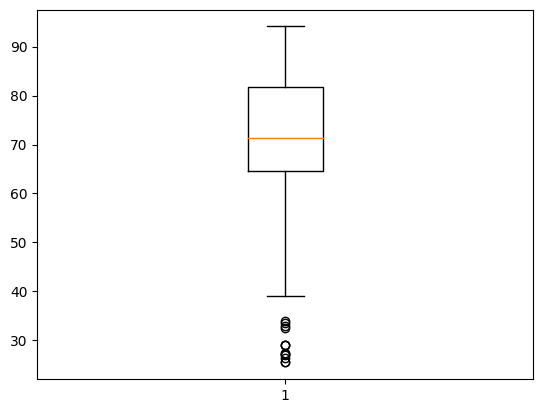

In [43]:
print(df2['body ratio'].isna().value_counts())
df2['body ratio']
plt.boxplot(df2['body ratio']);

**OS**

In [44]:
print(df2['OS'].isna().value_counts())

print(df2['OS'].value_counts() )
df2['OS'] = df2['OS'].apply(lambda x : x.split()[0])
print(df2['OS'].value_counts() )

##update 'OS'
df2['OS'] = df2['OS'].replace({'Phone': 'Windows', 'iPadOS': 'iOS'})
df2['OS'] = df2['OS'].apply(lambda x: x if x in ['Android', 'iOS', 'Windows'] else 'others')
print(df2['OS'].value_counts() )
'''
dummy_os = pd.get_dummies(df2['OS'] )
df2 = pd.concat([df2, dummy_os], axis=1)
df2.drop('OS', axis=1, inplace=True)
'''

False    2651
Name: OS, dtype: int64
Android 10       251
Android 9.0      188
Android 11       185
Android 4.4.2    175
Android 12       124
                ... 
Android 2.4        1
KaiOS 3.0          1
Mobile 6.5.3       1
HarmonyOS 3.1      1
Android 2.2.2      1
Name: OS, Length: 119, dtype: int64
Android      2449
Phone          64
iOS            60
HarmonyOS      21
Symbian        10
Belle           8
KaiOS           6
OS              5
iPadOS          5
EMUI            5
platform        5
Anna            3
Tizen           3
FP1             2
Firefox         1
Windows         1
Mobile          1
MeeGo           1
Linux           1
Name: OS, dtype: int64
Android    2449
others       72
Windows      65
iOS          65
Name: OS, dtype: int64


"\ndummy_os = pd.get_dummies(df2['OS'] )\ndf2 = pd.concat([df2, dummy_os], axis=1)\ndf2.drop('OS', axis=1, inplace=True)\n"

**battry capacity**

In [45]:
print(df2['battery_capacity'].isna().value_counts())

False    2651
Name: battery_capacity, dtype: int64


**CPU**

In [46]:
print(df2['CPU'].isna().value_counts())
df2['CPU'] = df2['CPU'].fillna('NAN')
df2.CPU.value_counts()

False    2372
True      279
Name: CPU, dtype: int64


8.0     1237
4.0      744
2.0      339
NAN      279
6.0       48
10.0       3
3.0        1
Name: CPU, dtype: int64

In [47]:
df2.CPU.nunique()

7

In [48]:
fi_df = pd.read_excel('FINAL_PRODUCTS2.xlsx')

In [49]:
fi_df['cpu'].isin(['Unknown']).value_counts()

False    3480
True      418
Name: cpu, dtype: int64

In [50]:
fi_df['name']  = fi_df['name'].apply(lambda x: x.lower() if x!='Unknown' else x )
fi_df.rename(columns={'cpu': 'CPU'}, inplace=True)


In [51]:
fi_df['CPU'].value_counts()[0:35]

Octa-core                       1300
Unknown                          418
Quad-core 1.2 GHz Cortex-A7      115
Quad-core 1.3 GHz Cortex-A7       81
Octa-core 2.0 GHz Cortex-A53      76
Quad-core 1.2 GHz Cortex-A53      66
Dual-core 1.0 GHz Cortex-A9       58
Hexa-core                         54
Quad-core 1.4 GHz Cortex-A53      50
1.0 GHz Scorpion                  48
Quad-core 1.2 GHz                 46
Octa-core 1.4 GHz Cortex-A53      43
Quad-core                         43
Dual-core 1.5 GHz Krait           41
Quad-core 1.1 GHz Cortex-A7       40
Quad-core 1.3 GHz Cortex-A53      38
1.0 GHz                           36
Dual-core 1.2 GHz                 35
1.0 GHz Cortex-A8                 34
Quad-core 2.3 GHz Krait 400       31
Dual-core 1.5 GHz Scorpion        30
1.0 GHz Cortex-A5                 29
Quad-core 2.0 GHz Cortex-A53      28
Octa-core 1.8 GHz Cortex-A53      27
Dual-core                         27
Dual-core 1.2 GHz Cortex-A9       26
Quad-core 1.5 GHz Cortex-A53      24
Q

In [52]:
fi_df['CPU'] = fi_df['CPU'].replace({r'Octa-core.*':8 ,
                                     r'Quad-core.*':4 ,
                                     r'Hexa-core.*':6 ,
                                     r'Dual-core.*':2 ,
                                     r'Deca-core.*':10 ,
                                     r'Single_core.*':1,
                                     r'\d+\.*\d*':1 ,}, regex=True)


In [53]:
fi_df['CPU'].value_counts()[0:20]

8             1575
4              871
1              491
2              480
Unknown        418
6               57
10               5
Intel Atom       1
Name: CPU, dtype: int64

In [54]:
df_combined = pd.merge(df, fi_df[['name', 'CPU']], on='name', how='left', suffixes=('', '_fi'))
#df_combined.info()

# Step 2: Fill NaN values in 'cpu' of df1 with 'cpu' values from df2 where names match
df_combined['CPU'] = df_combined['CPU'].fillna(df_combined['CPU_fi'])
# Step 3: Update df1 with the filled 'cpu' values (and drop the temporary 'cpu_df2' column if you wish)
df2['CPU'] = df_combined['CPU']

In [55]:

df[df2.CPU==3]

,Unnamed: 0,name,brand,2G,3G,4G,5G,Announced,Status,Weight,...,Bluetooth,GPU,Loudspeaker,3.5mm jack,Chipset,Network,Internal,Card slot,RAM,Storage
158,501,apple ipad air 2,apple,True,True,True,False,2014.0,Discontinued,437.0,...,"4.0, A2DP, EDR",PowerVR GXA6850 (octa-core graphics),False,True,Apple A8X (20 nm),GSM / CDMA / HSPA / EVDO / LTE HSPA 42.2/5.76 ...,"16GB 2GB RAM, 32GB 2GB RAM, 64GB 2GB RAM, 128G...",No,2.0,16.0


In [56]:
df2['CPU'].isna().value_counts()
df2['CPU'].value_counts()
df2['CPU'] = df2['CPU'].fillna('NAN')


In [57]:
df2['CPU'].value_counts()


8.0        1237
4.0         744
2.0         339
1           234
6.0          48
NAN          34
Unknown      11
10.0          3
3.0           1
Name: CPU, dtype: int64

**ratio**

In [58]:
df2.drop('ratio', axis=1 , inplace=True)

**PIXEL & PPI**

In [59]:
corr_matrix = df2[['ppi', 'pixel', 'Price']].corr()
corr_matrix


,ppi,pixel,Price
ppi,1.000000,0.814707,0.456231
pixel,0.814707,1.000000,0.618491
Price,0.456231,0.618491,1.000000


In [60]:
df2.drop('pixel', axis=1 , inplace=True)

In [61]:

from math import gcd

# Example dimensions
width = 1920
height = 1080

# Calculate the Greatest Common Divisor (GCD)
ratio_gcd = gcd(width, height)

# Simplify the width and height by the GCD to find the simplest ratio
simplified_width = width // ratio_gcd
simplified_height = height // ratio_gcd

(simplified_width, simplified_height)

(16, 9)

**WLAN**

In [62]:
df2.drop('WLAN', axis=1 , inplace=True)

**COLORS**

In [63]:
set_colors = set()
dict_colors = {}

for idx, row in df2.iterrows():
    if pd.notnull(row['Colors']):  # Check if 'Color' column value is not NaN
        colors = row['Colors'].split(',')  # Split
        for color in colors:
            color = color.strip()  # Remove leading/trailing whitespace
            color = color.title()
            set_colors.add(color)
            if color not in dict_colors:
                dict_colors[color] = 1
            else:
                dict_colors[color] += 1

In [64]:
len(set_colors) #1218
sorted_dict_colors = dict(sorted(dict_colors.items(), key=lambda item: item[1] , reverse=True))
sorted_dict_colors

{'Black': 1272,
 'White': 735,
 'Blue': 359,
 'Gold': 301,
 'Silver': 221,
 'Red': 193,
 'Gray': 135,
 'Green': 131,
 'Pink': 122,
 'Midnight Black': 83,
 'Yellow': 82,
 'Pearl White': 64,
 'Purple': 60,
 'Rose Gold': 59,
 'Space Gray': 43,
 'Champagne Gold': 43,
 'Orange': 41,
 'Charcoal Black': 38,
 'Violet': 30,
 'Ceramic White': 28,
 'Midnight Blue': 26,
 'Cyan': 26,
 'Sapphire Blue': 25,
 'Dark Gray': 24,
 'Graphite': 24,
 'Graphite Black': 24,
 'Titan': 24,
 'Dark Blue': 23,
 'Aurora Blue': 23,
 'Metallic Black': 22,
 'Cherry Red': 20,
 'Brown': 20,
 'Mint': 20,
 'Sky Blue': 19,
 'Pink Gold': 19,
 'Mint Green': 18,
 'Titanium Gray': 17,
 'Emerald Green': 17,
 'Phantom Black': 16,
 'Onyx Black': 16,
 'Pure White': 15,
 'Aurora Black': 15,
 'Light Blue': 15,
 'Bright Green': 15,
 'Lavender': 14,
 'Obsidian Black': 14,
 'Grey': 14,
 'Glacier White': 14,
 'Aurora': 14,
 'New Aurora Black': 14,
 'Gold Platinum': 14,
 'Dark Grey': 13,
 'Platinum Silver': 13,
 'Ocean Blue': 13,
 'Gunmet

In [65]:
df2['Count_Colors'] = df2['Colors'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 'NAN')

In [66]:
df2['Count_Colors'].value_counts()

df2['Count_Colors'] = pd.to_numeric(df2['Count_Colors'], errors='coerce')
corr_matrix_colors = df2[['Count_Colors', 'Price']].corr()
corr_matrix_colors

,Count_Colors,Price
Count_Colors,1.000000,0.088721
Price,0.088721,1.000000


In [67]:
df2.drop(['Count_Colors','Colors'], axis=1 , inplace=True)

**sensors**

In [68]:
set_sensors = set()
dict_sensors = {}

for idx, row in df2.iterrows():
    if pd.notnull(row['Sensors']):  # Check if 'Color' column value is not NaN
        sensors = row['Sensors'].split(',')  # Split
        for sensor in sensors :
            sensor = sensor.strip()  # Remove leading/trailing whitespace
            sensor = sensor.title()
            set_sensors.add(sensor)
            if sensor not in dict_sensors:
                dict_sensors[sensor] = 1
            else:
                dict_sensors[sensor] += 1

In [69]:
len(set_sensors) # 63
sorted_dict_sensors = dict(sorted(dict_sensors.items(), key=lambda item: item[1] , reverse=True))
sorted_dict_sensors

{'Accelerometer': 2623,
 'Proximity': 2228,
 'Compass': 1869,
 'Gyro': 1299,
 'Fingerprint (Rear-Mounted)': 454,
 'Barometer': 302,
 'Fingerprint (Side-Mounted)': 293,
 'Fingerprint (Under Display': 242,
 'Optical)': 211,
 'Fingerprint (Front-Mounted)': 164,
 'Color Spectrum': 95,
 'Heart Rate': 51,
 'Face Id': 44,
 'Ultrasonic)': 31,
 'Spo2': 31,
 'Gesture': 20,
 'Iris Scanner': 14,
 'Temperature': 9,
 'Infrared Face Id': 8,
 'Sensor Core': 8,
 'Humidity': 8,
 'Proximity (Accessories Only)': 7,
 'Yes': 5,
 'Uv': 4,
 'Fingerprint (Rear-Mounted': 3,
 'Fingerprint (Side-Mounted; Eu Model Only)': 3,
 'Barometer (Usa Only)': 3,
 'Unspecified Sensors': 2,
 'Altimeter': 2,
 'Fingerprint (Side-Mounted': 2,
 'Region Dependent)': 2,
 'Dual Fingerprint (Side-Mounted)': 2,
 'Barometer (China Only)': 2,
 'Compass (Lte Model Only)': 2,
 'Optical) - Market Dependant': 1,
 '5008T Only)': 1,
 '5059A/J Only)': 1,
 'Compass (7041X': 1,
 '7041D Only)': 1,
 'Gyro (Optional)': 1,
 'Gyroscope': 1,
 'Ambient

In [70]:
df2['Count_sensors'] = df2['Sensors'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 'NAN')

In [71]:
df2['Count_sensors'] = pd.to_numeric(df2['Count_sensors'], errors='coerce')
corr_matrix_sensors = df2[['Count_sensors', 'Price']].corr()
corr_matrix_sensors

,Count_sensors,Price
Count_sensors,1.000000,0.583211
Price,0.583211,1.000000


**speaker and jack**

In [72]:
df2['Loudspeaker'] = df2.Loudspeaker.astype(int)
df2["3.5mm jack"] = df2["3.5mm jack"].astype(int)
corr_matrix_sound = df2[['Loudspeaker', '3.5mm jack', 'Price']].corr()
corr_matrix_sound

,Loudspeaker,3.5mm jack,Price
Loudspeaker,1.000000,0.404524,-0.453985
3.5mm jack,0.404524,1.000000,-0.505048
Price,-0.453985,-0.505048,1.000000


In [73]:
df2.drop(['Loudspeaker', '3.5mm jack'] , axis=1 , inplace=True)

**Bluetooth**

In [74]:
df2.drop('Bluetooth' , axis=1 , inplace=True)

**GPU , CHIPSET**

In [75]:
df2.drop(['GPU','Chipset'] , axis=1 , inplace=True)

**INTERNAL**

In [76]:
df2.drop(['Internal'] , axis=1 , inplace=True)

**cart slot**

In [77]:
df2['Card slot'].value_counts()
df2['Card slot'] = df2['Card slot'].apply(lambda x:'yes' if x!='No' else 'No')
df2['Card slot'].value_counts()

yes    2202
No      449
Name: Card slot, dtype: int64

In [78]:
card_encoded = pd.get_dummies(df2, columns=['Card slot'], prefix='Card slot')
card_encoded
corr_matrix_slot = card_encoded[['Card slot_No' , 'Card slot_yes' , 'Price']].corr()
corr_matrix_slot

,Card slot_No,Card slot_yes,Price
Card slot_No,1.000000,-1.000000,0.368616
Card slot_yes,-1.000000,1.000000,-0.368616
Price,0.368616,-0.368616,1.000000


In [79]:
df2.drop(['Card slot'] , axis=1 , inplace=True)

**Network**

In [80]:
df2.drop('Network' , axis=1 , inplace=True)

In [81]:
#df2.to_excel('machine_question_3.xlsx')

**price**

<Axes: >

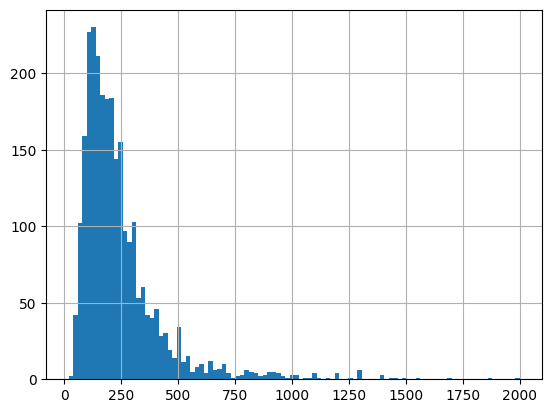

In [82]:
df2.Price.hist(bins=100)


In [83]:
df2.CPU=df2.CPU.astype(int)

ValueError: invalid literal for int() with base 10: 'NAN'

## **final**

In [84]:
df2.head(1)

,brand,3G,4G,5G,Announced,Status,Weight,Length,Width,Diameter,...,Price,CPU,Sensors,RAM,Storage,Micro-SIM,Mini-SIM,Nano-SIM,eSIM,Count_sensors
0,alcatel,1,1,0,2022.0,Available,172.0,146.7,71.9,10.0,...,100.0,4.0,Accelerometer,2.0,32.0,0,0,1,0,1.0


In [85]:
df2.drop(['Sensors'] , axis=1 , inplace=True)

In [86]:
df2.CPU = df2.CPU.apply(lambda x: np.nan if x in["NAN" , 'Unknown'] else x) # or (x == "NAN" or x == 'Unknown')
df2.CPU.value_counts()

8.0     1237
4.0      744
2.0      339
1.0      234
6.0       48
10.0       3
3.0        1
Name: CPU, dtype: int64

In [87]:
df2.dropna(subset=["CPU"],inplace=True)

In [88]:
df2['Width'] = df2['Width'].astype(float)


In [89]:
#df2['Count_sensors'] = df2['Count_sensors'].astype(int)
df2['Count_sensors'].isna().value_counts()
df2.dropna(subset=["Count_sensors"] , inplace=True)

In [90]:
df2['Display Type']

0                TFT
1                LCD
2                TFT
3                LCD
4                LCD
            ...     
2641             TFT
2642    Super AMOLED
2643             TFT
2644    Super AMOLED
2645    Super AMOLED
Name: Display Type, Length: 2589, dtype: object

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2651 non-null   int64  
 1   name              2651 non-null   object 
 2   brand             2651 non-null   object 
 3   2G                2651 non-null   bool   
 4   3G                2651 non-null   bool   
 5   4G                2651 non-null   bool   
 6   5G                2651 non-null   bool   
 7   Announced         2651 non-null   float64
 8   Status            2651 non-null   object 
 9   Weight            2651 non-null   float64
 10  Length            2651 non-null   object 
 11  Width             2651 non-null   object 
 12  Diameter          2651 non-null   object 
 13  SIM               2651 non-null   object 
 14  Display Type      2651 non-null   object 
 15  Display Size      2651 non-null   float64
 16  ppi               2651 non-null   float64


In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2589 entries, 0 to 2645
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             2589 non-null   object 
 1   3G                2589 non-null   int64  
 2   4G                2589 non-null   int64  
 3   5G                2589 non-null   int64  
 4   Announced         2589 non-null   float64
 5   Status            2589 non-null   object 
 6   Weight            2589 non-null   float64
 7   Length            2589 non-null   float64
 8   Width             2589 non-null   float64
 9   Diameter          2589 non-null   float64
 10  Display Type      2589 non-null   object 
 11  Display Size      2589 non-null   float64
 12  ppi               2589 non-null   float64
 13  body ratio        2589 non-null   float64
 14  OS                2589 non-null   object 
 15  battery_capacity  2589 non-null   float64
 16  Price             2589 non-null   float64


## **first scenario**

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
import xgboost as xgb
from sklearn import metrics


In [101]:
X = df2.drop('Price', axis=1)  # Features
y = df2['Price']  # Target variable

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [110]:
## lable encoding

le_status = LabelEncoder()
le_brand = LabelEncoder()
le_display_type = LabelEncoder()

X_train['brand'] = le_brand.fit_transform(X_train['brand'])
X_val['brand'] = le_brand.transform(X_val['brand'])
X_test['brand'] = le_brand.transform(X_test['brand'])

X_train['Status'] = le_status.fit_transform(X_train['Status'])
X_val['Status'] = le_status.transform(X_val['Status'])
X_test['Status'] = le_status.transform(X_test['Status'])

X_train['Display Type'] = le_display_type.fit_transform(X_train['Display Type'])
X_val['Display Type'] = le_display_type.transform(X_val['Display Type'])
X_test['Display Type'] = le_display_type.transform(X_test['Display Type'])

X_train = pd.get_dummies(X_train, 'OS', drop_first=True)
X_val = pd.get_dummies(X_val, 'OS', drop_first=True)
X_test = pd.get_dummies(X_test, 'OS', drop_first=True)


In [97]:
## Initialize OneHotEncoder

oe_brand = OneHotEncoder(sparse=False)  # sparse=False to get a dense array
oe_status = OneHotEncoder(sparse=False)
oe_display_type = OneHotEncoder(sparse=False)

# Brand
brand_encoded_train = oe_brand.fit_transform(X_train[['brand']])
brand_encoded_val = oe_brand.transform(X_val[['brand']])
brand_encoded_test = oe_brand.transform(X_test[['brand']])

# Convert encoded arrays to dataframes with appropriate column names
columns_brand = oe_brand.get_feature_names_out(['brand'])
X_train[columns_brand] = pd.DataFrame(brand_encoded_train, index=X_train.index)
X_val[columns_brand] = pd.DataFrame(brand_encoded_val, index=X_val.index)
X_test[columns_brand] = pd.DataFrame(brand_encoded_test, index=X_test.index)

# Status
status_encoded_train = oe_status.fit_transform(X_train[['Status']])
status_encoded_val = oe_status.transform(X_val[['Status']])
status_encoded_test = oe_status.transform(X_test[['Status']])

# Convert encoded arrays to dataframes with appropriate column names
columns_status = oe_status.get_feature_names_out(['Status'])
X_train[columns_status] = pd.DataFrame(status_encoded_train, index=X_train.index)
X_val[columns_status] = pd.DataFrame(status_encoded_val, index=X_val.index)
X_test[columns_status] = pd.DataFrame(status_encoded_test, index=X_test.index)

# Display Type
display_type_encoded_train = oe_display_type.fit_transform(X_train[['Display Type']])
display_type_encoded_val = oe_display_type.transform(X_val[['Display Type']])
display_type_encoded_test = oe_display_type.transform(X_test[['Display Type']])

# Convert encoded arrays to dataframes with appropriate column names
columns_display_type = oe_display_type.get_feature_names_out(['Display Type'])
X_train[columns_display_type] = pd.DataFrame(display_type_encoded_train, index=X_train.index)
X_val[columns_display_type] = pd.DataFrame(display_type_encoded_val, index=X_val.index)
X_test[columns_display_type] = pd.DataFrame(display_type_encoded_test, index=X_test.index)

# Now, you should drop the original 'brand', 'Status', and 'Display Type' columns, if not needed
X_train = X_train.drop(['brand', 'Status', 'Display Type'], axis=1)
X_val = X_val.drop(['brand', 'Status', 'Display Type'], axis=1)
X_test = X_test.drop(['brand', 'Status', 'Display Type'], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [98]:
'''
df2['brand'] = df2['brand'].astype('category').cat.codes
le = LabelEncoder()
le.fit_transform(df2.brand)
le.fit_transform(df2.Status)
le.fit_transform(df2['Display Type'])
'''

"\ndf2['brand'] = df2['brand'].astype('category').cat.codes\nle = LabelEncoder()\nle.fit_transform(df2.brand)\nle.fit_transform(df2.Status)\nle.fit_transform(df2['Display Type'])\n"

In [111]:
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
model.fit(X_train,y_train)
y_val_pred = model.predict(X_val)

# Mean Squared Error
mse = metrics.mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_val, y_val_pred)
print(f"Mean Absolute Error (MAE): {mae}")

r2 = metrics.r2_score(y_val, y_val_pred)
print(f"R-squared (R²): {r2}")

# mape = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape = metrics.mean_absolute_percentage_error(y_val, y_val_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")




Mean Squared Error (MSE): 12552.411770374696
Mean Absolute Error (MAE): 65.68963784535725
R-squared (R²): 0.682529579559537
Mean Absolute Percentage Error (MAPE): 0.28575387901160354


In [112]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators":[100,200,300,500,1000],
    'max_depth': [1,3,5,10,20],
    'max_leaves': [1,3,5,10],
    'eta':[0.1,0.01,0.001],
    'gamma':[0,0.01,0.05,0.1],
    'alpha':[0,0.001,0.01,0.1],
    'lambda':[0,0.001,0.01,0.1]

    }
reg=xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
grid_search = GridSearchCV(reg, params, cv=5)
grid_search.fit(X_train,y_train)
y_pred=grid_search.best_estimator_.predict(X_train)
print("best estimator: ",grid_search.best_params_,"r2_score for train data: ",r2_score(y_train,y_pred))
print("best estimator: ",grid_search.best_params_,"MSE for train data: ",mean_squared_error(y_train,y_pred))

y_pred=grid_search.best_estimator_.predict(X_val)
print("best estimator: ",grid_search.best_params_,"r2_score for evaluation data: ",r2_score(y_val,y_pred))
print("best estimator: ",grid_search.best_params_,"MSE for evaluation data: ",mean_squared_error(y_val,y_pred))

KeyboardInterrupt: 

In [ ]:
feature_importance = model.feature_importances_
print("Feature Importance: ",feature_importance)
print(X_train.columns)

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)


# Specify model parameters
params = {
    'objective': 'reg:squarederror',  # for regression tasks
    'max_depth': 10,  # can be tuned
    'eta': 0.01,  # learning rate, can be tuned
    'eval_metric': 'rmse',  # evaluation metric

}

# Specify the number of boosting rounds
num_boost_round = 1000

# Train the model
evals = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params, dtrain, num_boost_round, evals=evals, early_stopping_rounds=15)

# Use model for predictions
y_pred = model.predict(dtest)


# Mean Squared Error
mse = metrics.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

r2 = metrics.r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# mape = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


In [113]:
y_test_pred = model.predict(X_test)

# Mean Squared Error
mse = metrics.mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Error (MAE): {mae}")

r2 = metrics.r2_score(y_test, y_test_pred)
print(f"R-squared (R²): {r2}")

# mape = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape = metrics.mean_absolute_percentage_error(y_test, y_test_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Squared Error (MSE): 12120.119965729105
Mean Absolute Error (MAE): 61.67230578405385
R-squared (R²): 0.6147917340523862
Mean Absolute Percentage Error (MAPE): 0.2842694950038606


## **second senario**

In [114]:
df3 = df2.copy()

In [115]:
df3['Length-Width-Diameter'] = df3['Length']*df3['Width']*df3['Diameter']

In [116]:
df3['Length-Width-Diameter'] = df3['Length-Width-Diameter'].astype(int)
df3['Length-Width-Diameter'].head()

0    105477
1    113477
2     88595
3    108918
4    110170
Name: Length-Width-Diameter, dtype: int64

In [117]:
df3.drop(['Length','Width','Diameter'] , axis=1 , inplace=True)

In [ ]:
#df3['Age_phone'] = (2024 - df3['Announced'])*365 >> not useful

In [ ]:
#df3['RAM_Storage'] = df3['RAM'] * df3['Storage']
#df3.drop(['RAM','Storage'] , axis=1 , inplace=True)
#df3.drop(['Count_sensors'] , axis=1 , inplace=True)

In [ ]:

#df3.drop(['Display Type', 'Micro-SIM', 'Mini-SIM', 'Nano-SIM', 'eSIM'] , axis=1 , inplace=True )

In [ ]:
#df3.drop('Length-Width-Diameter' , axis=1 , inplace=True)

In [118]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2589 entries, 0 to 2645
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  2589 non-null   object 
 1   3G                     2589 non-null   int64  
 2   4G                     2589 non-null   int64  
 3   5G                     2589 non-null   int64  
 4   Announced              2589 non-null   float64
 5   Status                 2589 non-null   object 
 6   Weight                 2589 non-null   float64
 7   Display Type           2589 non-null   object 
 8   Display Size           2589 non-null   float64
 9   ppi                    2589 non-null   float64
 10  body ratio             2589 non-null   float64
 11  OS                     2589 non-null   object 
 12  battery_capacity       2589 non-null   float64
 13  Price                  2589 non-null   float64
 14  CPU                    2589 non-null   float64
 15  RAM 

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
import xgboost as xgb
from sklearn import metrics


In [138]:
X = df3.drop('Price', axis=1)  # Features
y = df3['Price']  # Target variable

<Axes: >

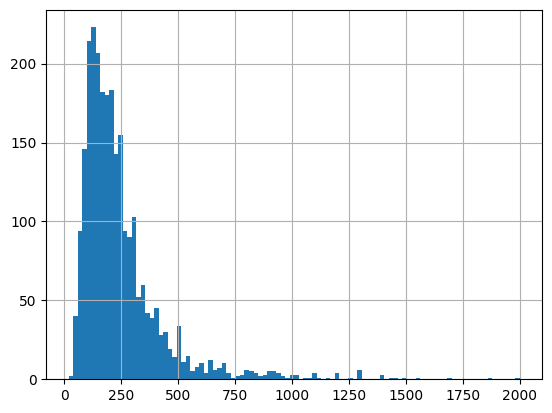

In [135]:
y.hist(bins=100)

<Axes: >

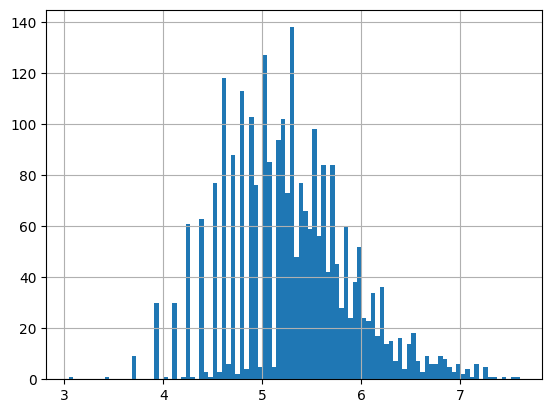

In [136]:
np.log1p(y).hist(bins=100)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [140]:
X_train = pd.get_dummies(X_train, columns=['brand', 'Status','OS','Display Type'], drop_first=True)
X_val = pd.get_dummies(X_val, columns=['brand', 'Status','OS','Display Type'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['brand', 'Status','OS','Display Type'], drop_first=True)

In [124]:
df2[['Display Size' , 'ppi' , 'body ratio']]

,Display Size,ppi,body ratio
0,5.50,293.0,74.0
1,6.10,282.0,78.1
2,5.00,215.0,71.4
3,6.52,269.0,82.0
4,6.52,269.0,82.0
...,...,...,...
2641,7.00,170.0,60.2
2642,4.00,233.0,56.9
2643,3.50,165.0,51.1
2644,4.00,233.0,58.0


In [141]:
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
model.fit(X_train,y_train)
y_val_pred = model.predict(X_val)

# Mean Squared Error
mse = metrics.mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_val, y_val_pred)
print(f"Mean Absolute Error (MAE): {mae}")

r2 = metrics.r2_score(y_val, y_val_pred)
print(f"R-squared (R²): {r2}")

# mape = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape = metrics.mean_absolute_percentage_error(y_val, y_val_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Squared Error (MSE): 12419.876681350017
Mean Absolute Error (MAE): 64.40704026447642
R-squared (R²): 0.6858816023584611
Mean Absolute Percentage Error (MAPE): 0.2723036847601399


[39 34 31  1 37 15  2  0 38 13 17  7 14  9 22 24 26 30 35  3 18 25  8  4
 28 19 33 23 27  6 40 21 12 36 11  5 29 20 10 32 16]
[39 34 31  1 37 15  2  0 38 13 17  7 14  9 22 24 26 30 35  3 18 25  8  4
 28 19 33 23 27  6 40 21 12 36 11  5 29 20 10 32 16]


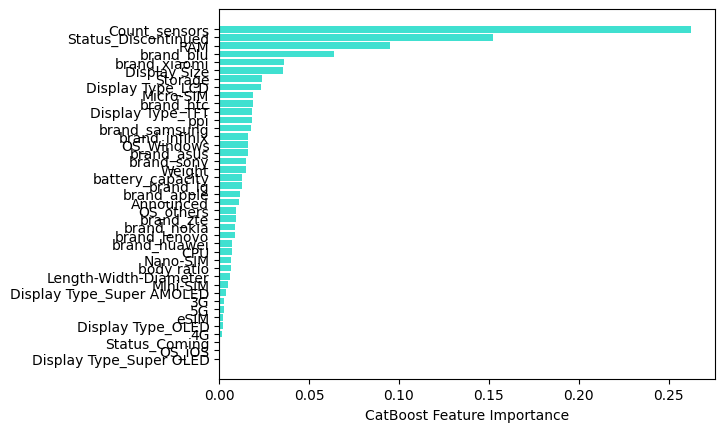

NameError: name 'shap' is not defined

In [126]:
sorted_feature_importance = model.feature_importances_.argsort()
print(sorted_feature_importance)

feature_names = X_train.columns[sorted_feature_importance]
print(sorted_feature_importance)

plt.barh(feature_names, model.feature_importances_[sorted_feature_importance], color='turquoise')
plt.xlabel("CatBoost Feature Importance")
plt.show()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)
# Use the correct feature names for the SHAP summary plot
shap.summary_plot(shap_values, X_val, feature_names=feature_names)

In [142]:
y_test_pred = model.predict(X_test)

# Mean Squared Error
mse = metrics.mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Error (MAE): {mae}")

r2 = metrics.r2_score(y_test, y_test_pred)
print(f"R-squared (R²): {r2}")

# mape = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape = metrics.mean_absolute_percentage_error(y_test, y_test_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Squared Error (MSE): 13531.084250504742
Mean Absolute Error (MAE): 63.22174791860702
R-squared (R²): 0.5699476972780569
Mean Absolute Percentage Error (MAPE): 0.28704768711313977


## **senario 3**

In [143]:
X = df3.drop('Price', axis=1)  # Features
y = df3['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


X_train = pd.get_dummies(X_train, columns=['brand', 'Status','OS','Display Type'], drop_first=True)
X_val = pd.get_dummies(X_val, columns=['brand', 'Status','OS','Display Type'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['brand', 'Status','OS','Display Type'], drop_first=True)


y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

## validation
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
model.fit(X_train,y_train_log)
y_val_pred = model.predict(X_val)

# Mean Squared Error
mse = metrics.mean_squared_error(y_val_log, y_val_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_val_log, y_val_pred)
print(f"Mean Absolute Error (MAE): {mae}")

r2 = metrics.r2_score(y_val_log, y_val_pred)
print(f"R-squared (R²): {r2}")

# mape = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape = metrics.mean_absolute_percentage_error(y_val_log, y_val_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


## test
y_test_pred = model.predict(X_test)

# Mean Squared Error
mse = metrics.mean_squared_error(y_test_log, y_test_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_log, y_test_pred)
print(f"Mean Absolute Error (MAE): {mae}")

r2 = metrics.r2_score(y_test_log, y_test_pred)
print(f"R-squared (R²): {r2}")

# mape = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape = metrics.mean_absolute_percentage_error(y_test_log, y_test_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Squared Error (MSE): 0.09847884981814135
Mean Absolute Error (MAE): 0.23333030010873285
R-squared (R²): 0.739892375397356
Mean Absolute Percentage Error (MAPE): 0.0443829250991187
Mean Squared Error (MSE): 0.09756781936835174
Mean Absolute Error (MAE): 0.2340691605453057
R-squared (R²): 0.7191986597862019
Mean Absolute Percentage Error (MAPE): 0.045456282244397975


# **catboost**

## **senario 1**

In [144]:
! pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 3.2 MB/s eta 0:00:00


In [146]:
import catboost as cb

train_dataset = cb.Pool(X_train, y_train)
val_dataset = cb.Pool(X_val, y_val)
test_dataset = cb.Pool(X_test, y_test)


model_cb = cb.CatBoostRegressor(loss_function='RMSE')

grid = {'iterations': [100, 150, 200 , 500 ],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8 , 10],
        'l2_leaf_reg': [0.1 , 0.2, 0.5, 1, 3]}
model_cb.grid_search(grid, train_dataset)


Streaming output truncated to the last 5000 lines.
51:	learn: 60.6460486	test: 111.8229962	best: 111.8229962 (51)	total: 1.3s	remaining: 11.2s
52:	learn: 59.9709030	test: 111.6614966	best: 111.6614966 (52)	total: 1.33s	remaining: 11.2s
53:	learn: 59.5956795	test: 111.3920350	best: 111.3920350 (53)	total: 1.35s	remaining: 11.2s
54:	learn: 58.9164359	test: 111.4354783	best: 111.3920350 (53)	total: 1.4s	remaining: 11.3s
55:	learn: 58.5405488	test: 111.3073752	best: 111.3073752 (55)	total: 1.42s	remaining: 11.3s
56:	learn: 57.9653934	test: 111.1753427	best: 111.1753427 (56)	total: 1.45s	remaining: 11.2s
57:	learn: 57.2845648	test: 111.1192831	best: 111.1192831 (57)	total: 1.47s	remaining: 11.2s
58:	learn: 57.0322251	test: 111.0393554	best: 111.0393554 (58)	total: 1.49s	remaining: 11.2s
59:	learn: 56.7206056	test: 110.9296878	best: 110.9296878 (59)	total: 1.52s	remaining: 11.1s
60:	learn: 56.3121130	test: 110.8233150	best: 110.8233150 (60)	total: 1.54s	remaining: 11.1s
61:	learn: 55.7561990

{'params': {'depth': 4,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.1,
  'iterations': 500},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [156]:
# Evaluate on validation set
print("validation performance")

y_val_pred = model_cb.predict(X_val)

# Mean Squared Error
mse = metrics.mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error
rmse = np.sqrt(metrics.mean_squared_error(y_val, y_val_pred))
print(f'RMSE: {rmse:.2f}')

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_val, y_val_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared
r2 = metrics.r2_score(y_val, y_val_pred)
print(f"R-squared (R²): {r2}")

# Mean Absolute Percentage Error
mape = metrics.mean_absolute_percentage_error(y_val, y_val_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")



# test
# Evaluate on validation set
print("validation performance")

y_test_pred = model_cb.predict(X_test)

# Mean Squared Error
mse = metrics.mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(f'RMSE: {rmse:.2f}')

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared
r2 = metrics.r2_score(y_test, y_test_pred)
print(f"R-squared (R²): {r2}")

# Mean Absolute Percentage Error
mape = metrics.mean_absolute_percentage_error(y_test, y_test_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

validation performance
Mean Squared Error (MSE): 10100.865284736985
RMSE: 100.50
Mean Absolute Error (MAE): 59.66989024181828
R-squared (R²): 0.7445330819750342
Mean Absolute Percentage Error (MAPE): 0.25851938549538095
validation performance
Mean Squared Error (MSE): 10573.388401381144
RMSE: 102.83
Mean Absolute Error (MAE): 58.0701143268645
R-squared (R²): 0.6639508005858564
Mean Absolute Percentage Error (MAPE): 0.27010215688575656


In [148]:
! pip install shap;
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.8 MB/s eta 0:00:00


[31  0 13  1 33 25 38 40 39 23 24 35 26 32 28 14 21 30 36  9 20 12 34 15
 27 18 22  2 37 29 19  8 17  5  3  7 11  6  4 10 16]
[31  0 13  1 33 25 38 40 39 23 24 35 26 32 28 14 21 30 36  9 20 12 34 15
 27 18 22  2 37 29 19  8 17  5  3  7 11  6  4 10 16]


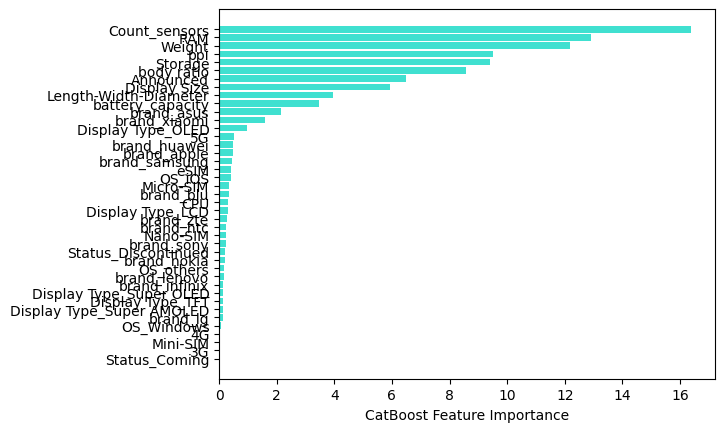

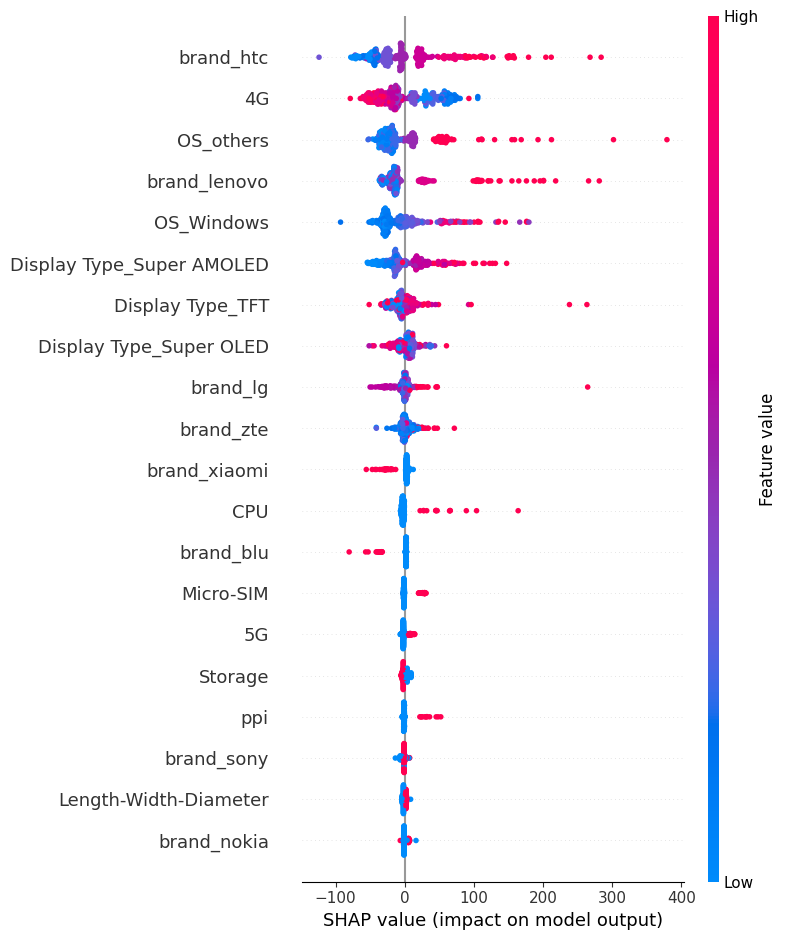

In [149]:
sorted_feature_importance = model_cb.feature_importances_.argsort()
print(sorted_feature_importance)

feature_names = X_train.columns[sorted_feature_importance]
print(sorted_feature_importance)

plt.barh(feature_names, model_cb.feature_importances_[sorted_feature_importance], color='turquoise')
plt.xlabel("CatBoost Feature Importance")
plt.show()

explainer = shap.TreeExplainer(model_cb)
shap_values = explainer.shap_values(X_val)
# Use the correct feature names for the SHAP summary plot
shap.summary_plot(shap_values, X_val, feature_names=feature_names)

In [151]:
train_dataset2 = cb.Pool(X_train, y_train)
val_dataset2 = cb.Pool(X_val, y_val)
test_dataset2 = cb.Pool(X_test, y_test)


model_cb2 = cb.CatBoostRegressor(loss_function='RMSE')
model_cb2.fit(X_train, y_train)

Learning rate set to 0.045199
0:	learn: 193.0091029	total: 3.84ms	remaining: 3.83s
1:	learn: 188.6858119	total: 6.64ms	remaining: 3.31s
2:	learn: 184.8662817	total: 9.06ms	remaining: 3.01s
3:	learn: 181.2146973	total: 11.5ms	remaining: 2.85s
4:	learn: 177.4941205	total: 13.9ms	remaining: 2.76s
5:	learn: 174.2270200	total: 16.3ms	remaining: 2.69s
6:	learn: 171.2508232	total: 18.7ms	remaining: 2.65s
7:	learn: 168.1837719	total: 21.1ms	remaining: 2.62s
8:	learn: 165.3056278	total: 23.5ms	remaining: 2.59s
9:	learn: 162.5468727	total: 25.9ms	remaining: 2.56s
10:	learn: 159.7717031	total: 28.3ms	remaining: 2.54s
11:	learn: 157.1941279	total: 30.8ms	remaining: 2.53s
12:	learn: 154.6966784	total: 33.2ms	remaining: 2.52s
13:	learn: 152.2797638	total: 35.8ms	remaining: 2.52s
14:	learn: 150.1092394	total: 38.2ms	remaining: 2.51s
15:	learn: 148.0263025	total: 40.6ms	remaining: 2.5s
16:	learn: 146.0756490	total: 43ms	remaining: 2.49s
17:	learn: 144.1644354	total: 45.4ms	remaining: 2.48s
18:	learn: 

In [153]:
# Evaluate on validation set
print("validation performance")

y_val_pred = model_cb2.predict(X_val)

# Mean Squared Error
mse = metrics.mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error
rmse = np.sqrt(metrics.mean_squared_error(y_val, y_val_pred))
print(f'RMSE: {rmse:.2f}')

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_val, y_val_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared
r2 = metrics.r2_score(y_val, y_val_pred)
print(f"R-squared (R²): {r2}")

# Mean Absolute Percentage Error
mape = metrics.mean_absolute_percentage_error(y_val, y_val_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

validation performance
Mean Squared Error (MSE): 10137.905883487285
RMSE: 100.69
Mean Absolute Error (MAE): 60.67932931055477
R-squared (R²): 0.7435962664312374
Mean Absolute Percentage Error (MAPE): 0.261833295285609


In [155]:
# test
# Evaluate on validation set
print("validation performance")

y_test_pred = model_cb2.predict(X_test)

# Mean Squared Error
mse = metrics.mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(f'RMSE: {rmse:.2f}')

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared
r2 = metrics.r2_score(y_test, y_test_pred)
print(f"R-squared (R²): {r2}")

# Mean Absolute Percentage Error
mape = metrics.mean_absolute_percentage_error(y_test, y_test_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

validation performance
Mean Squared Error (MSE): 10623.741787056573
RMSE: 103.07
Mean Absolute Error (MAE): 58.38453712091761
R-squared (R²): 0.6623504418076043
Mean Absolute Percentage Error (MAPE): 0.2695851184858646


## **senario 2**

In [161]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2589 entries, 0 to 2645
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             2589 non-null   object 
 1   3G                2589 non-null   int64  
 2   4G                2589 non-null   int64  
 3   5G                2589 non-null   int64  
 4   Announced         2589 non-null   float64
 5   Status            2589 non-null   object 
 6   Weight            2589 non-null   float64
 7   Length            2589 non-null   float64
 8   Width             2589 non-null   float64
 9   Diameter          2589 non-null   float64
 10  Display Type      2589 non-null   object 
 11  Display Size      2589 non-null   float64
 12  ppi               2589 non-null   float64
 13  body ratio        2589 non-null   float64
 14  OS                2589 non-null   object 
 15  battery_capacity  2589 non-null   float64
 16  Price             2589 non-null   float64


In [166]:
df4 = df2.copy()

#df4['Length-Width-Diameter'] = df4['Length']*df4['Width']*df4['Diameter']
#df4['Length-Width-Diameter'] = df4['Length-Width-Diameter'].astype(int)
#df4['Length-Width-Diameter'].head()

df4.drop(['Length','Width','Diameter'] , axis=1 , inplace=True)

#df3['RAM_Storage'] = df3['RAM'] * df3['Storage']
#df3.drop(['RAM','Storage'] , axis=1 , inplace=True)
#df3.drop(['Count_sensors'] , axis=1 , inplace=True)

df4.drop(['Micro-SIM', 'Mini-SIM', 'Nano-SIM', 'eSIM'] , axis=1 , inplace=True )

#df3.drop('Length-Width-Diameter' , axis=1 , inplace=True)


In [167]:

X = df4.drop('Price', axis=1)  # Features
y = df4['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


In [170]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870 entries, 938 to 1711
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   3G                         1870 non-null   int64  
 1   4G                         1870 non-null   int64  
 2   5G                         1870 non-null   int64  
 3   Announced                  1870 non-null   float64
 4   Weight                     1870 non-null   float64
 5   Display Size               1870 non-null   float64
 6   ppi                        1870 non-null   float64
 7   body ratio                 1870 non-null   float64
 8   battery_capacity           1870 non-null   float64
 9   CPU                        1870 non-null   float64
 10  RAM                        1870 non-null   float64
 11  Storage                    1870 non-null   float64
 12  Count_sensors              1870 non-null   float64
 13  brand_apple                1870 non-null   uin

In [168]:

X_train = pd.get_dummies(X_train, columns=['brand', 'Status','OS','Display Type'], drop_first=True)
X_val = pd.get_dummies(X_val, columns=['brand', 'Status','OS','Display Type'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['brand', 'Status','OS','Display Type'], drop_first=True)


y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

In [169]:
model_cb3 = cb.CatBoostRegressor(loss_function='RMSE')
model_cb3.fit(X_train, y_train_log)

## validation
y_val_pred = model_cb3.predict(X_val)

# Mean Squared Error
mse = metrics.mean_squared_error(y_val_log, y_val_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_val_log, y_val_pred)
print(f"Mean Absolute Error (MAE): {mae}")

r2 = metrics.r2_score(y_val_log, y_val_pred)
print(f"R-squared (R²): {r2}")

# mape = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape = metrics.mean_absolute_percentage_error(y_val_log, y_val_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


## test
y_test_pred = model_cb3.predict(X_test)

# Mean Squared Error
mse = metrics.mean_squared_error(y_test_log, y_test_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_log, y_test_pred)
print(f"Mean Absolute Error (MAE): {mae}")

r2 = metrics.r2_score(y_test_log, y_test_pred)
print(f"R-squared (R²): {r2}")

# mape = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape = metrics.mean_absolute_percentage_error(y_test_log, y_test_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Learning rate set to 0.045199
0:	learn: 0.6193943	total: 2.77ms	remaining: 2.77s
1:	learn: 0.6050200	total: 5.04ms	remaining: 2.52s
2:	learn: 0.5918684	total: 7.26ms	remaining: 2.41s
3:	learn: 0.5786853	total: 9.35ms	remaining: 2.33s
4:	learn: 0.5661380	total: 11.4ms	remaining: 2.28s
5:	learn: 0.5546714	total: 13.7ms	remaining: 2.26s
6:	learn: 0.5423895	total: 16ms	remaining: 2.27s
7:	learn: 0.5321802	total: 18.4ms	remaining: 2.28s
8:	learn: 0.5217900	total: 20.8ms	remaining: 2.29s
9:	learn: 0.5122507	total: 23.1ms	remaining: 2.29s
10:	learn: 0.5037658	total: 25.6ms	remaining: 2.3s
11:	learn: 0.4948271	total: 28ms	remaining: 2.31s
12:	learn: 0.4866947	total: 30.2ms	remaining: 2.3s
13:	learn: 0.4787254	total: 32.8ms	remaining: 2.31s
14:	learn: 0.4711337	total: 35.2ms	remaining: 2.31s
15:	learn: 0.4636244	total: 37.6ms	remaining: 2.31s
16:	learn: 0.4572019	total: 40.1ms	remaining: 2.32s
17:	learn: 0.4509419	total: 42.6ms	remaining: 2.32s
18:	learn: 0.4448516	total: 45.3ms	remaining: 2.34

## **ensamble**

In [177]:
from sklearn.ensemble import  StackingRegressor
from sklearn.linear_model import LinearRegression


# Define base models
estimators = [
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, random_state=42)),
    ('catboost', cb.CatBoostRegressor(silent=True, random_state=42, depth=8, iterations=1000)),
]

# Define stacking model
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

# Fit the model
stacking_regressor.fit(X_train, y_train_log)

# Score the model
score = stacking_regressor.score(X_test, y_test_log)

print(f"Test score: {score}")

predictions = stacking_regressor.predict(X_test)
# Calculate MSE
mse = metrics.mean_squared_error(y_test_log, predictions)
print(f"Mean Squared Error (MSE): {mse}")
# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Calculate MAE
mae = metrics.mean_absolute_error(y_test_log, predictions)
print(f"Mean Absolute Error (MAE): {mae}")
# Calculate R-squared (R²)
r2 = metrics.r2_score(y_test_log, predictions)
print(f"R-squared (R²): {r2}")
# Calculate MAPE
mape = metrics.mean_absolute_percentage_error(y_test_log, predictions)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Test score: 0.7550636715920767
Mean Squared Error (MSE): 0.08510608755875604
Root Mean Squared Error (RMSE): 0.29172947667103516
Mean Absolute Error (MAE): 0.21615765871329015
R-squared (R²): 0.7550636715920767
Mean Absolute Percentage Error (MAPE): 0.041832988176206495
